In [1]:
# Support Vector Machine (SVM)

# Importing the libraries
import numpy as np
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv(r"D:\Meta scifor\Machine Learning\Datasets\Advertisements.csv")


In [3]:
df.info()  #displays the column names, null values and datatype of the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.isna().sum() #checking for null values in the dataset

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.describe() #descriptive statistics information

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [8]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values #Declaring X and y variables

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((300, 2), (100, 2), (300,), (100,))

In [12]:
# C - The Regularization parameter (often termed as C parameter in python’s sklearn library)
# tells the SVM optimization how much you want to avoid misclassifying each training example.

# For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane
# does a better job of getting all the training points classified correctly. Conversely, a very small
# value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that
# hyperplane misclassifies more points.

#_________________________________________

# Kernel : In machine learning, the radial basis function kernel, or RBF kernel,
# is a popular kernel function used in various kernelized learning algorithms.
# In particular, it is commonly used in support vector machine classification.

#_________________________________________

# Learn more about this from:

#  https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/



#### Gamma
gamma is a parameter of the RBF kernel and can be thought of as the ‘spread’ of the kernel and therefore
the decision region. **When gamma is low, the ‘curve’ of the decision boundary is very low and thus the decision
region is very broad. When gamma is high, the ‘curve’ of the decision boundary is high**, which creates islands of
decision-boundaries around data points. We will see this very clearly below.

#### C
C is a parameter of the SVC learner and is the penalty for misclassifying a data point. When C is small, the classifier is okay with misclassified data points (high bias, low variance). When C is large, the classifier is heavily penalized for misclassified data and therefore bends over backwards avoid any misclassified data points (low bias, high variance).

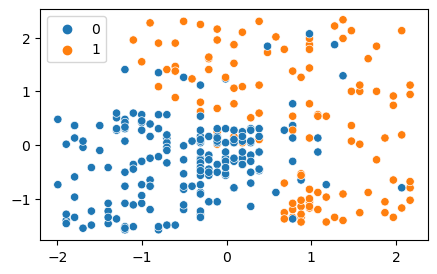

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 3))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0],
                y=X_train[:, 1],
                hue=y_train,
                );

In [14]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [16]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [17]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [19]:
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



In [21]:
from sklearn.metrics import accuracy_score, recall_score,precision_score

In [22]:
print(accuracy_score(y_test,y_pred))

0.9


In [23]:
print(precision_score(y_test,y_pred))

0.9230769230769231


In [24]:
print(recall_score(y_test,y_pred))

0.75


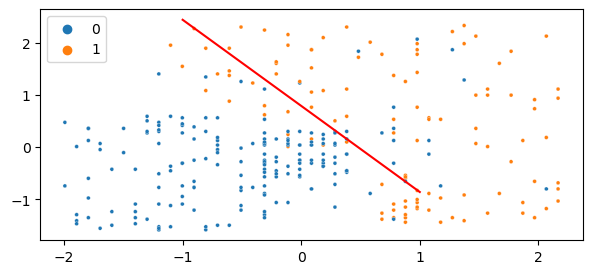

In [25]:
plt.figure(figsize=(7, 3))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0],
                y=X_train[:, 1],
                hue=y_train,
                s=8);
# Constructing a hyperplane using a formula.
w = classifier.coef_[0]           # w consists of 2 elements
b = classifier.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');